In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# for predicting shipping on time and late delivery 
df = pd.read_csv('df_ontime_vs_late.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df

,Type,Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Customer Segment,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Shipping Mode,order date y-m,shipping date y-m
0,TRANSFER,4,Shipping on time,0,Consumer,725.0,5,Golf,18.253332,-66.370514,...,2420,39.990002,0.50,5,199.949997,83.980003,Caribbean,Standard Class,2015-01,2015-01
1,TRANSFER,4,Late delivery,1,Consumer,725.0,4,Apparel,18.292149,-66.370613,...,989,59.990002,-0.55,5,299.950012,-155.899994,Central America,Standard Class,2015-01,2015-01
2,TRANSFER,4,Shipping on time,0,Corporate,94541.0,5,Golf,37.675510,-122.049683,...,922,39.990002,0.33,2,79.980003,23.389999,South America,Standard Class,2015-01,2015-01
3,TRANSFER,4,Shipping on time,0,Consumer,725.0,5,Golf,18.202093,-66.370583,...,3424,39.990002,0.08,5,199.949997,13.260000,South America,Standard Class,2015-01,2015-01
4,TRANSFER,4,Late delivery,1,Consumer,725.0,6,Outdoors,18.215712,-66.370560,...,2749,47.990002,-0.06,5,239.949997,-14.280000,Caribbean,Standard Class,2015-01,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172757,CASH,4,Late delivery,1,Consumer,725.0,4,Apparel,18.289610,-66.037056,...,180475,215.820007,0.26,1,215.820007,54.430000,Eastern Asia,Standard Class,2018-01,2018-02
172758,CASH,4,Late delivery,1,Consumer,725.0,4,Apparel,18.239115,-66.037056,...,180160,215.820007,0.35,1,215.820007,64.209999,Southeast Asia,Standard Class,2018-01,2018-02
172759,CASH,4,Late delivery,1,Consumer,725.0,4,Apparel,18.209925,-66.037056,...,180409,215.820007,0.38,1,215.820007,66.360001,South Asia,Standard Class,2018-01,2018-02
172760,DEBIT,1,Late delivery,1,Consumer,725.0,4,Apparel,18.229307,-66.037056,...,180394,215.820007,0.28,1,215.820007,51.369999,South Asia,First Class,2018-01,2018-02


#### Onehot Encoded df

In [5]:
df = df.drop(columns=[
    'Late_delivery_risk'
], axis=1)

In [6]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [7]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [8]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [9]:
df_cont_var = df.select_dtypes(exclude='object')

In [10]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [11]:
df_ohe = pd.concat([df_ohe, df['Delivery Status'] ], axis=1)

In [12]:
df=df_ohe

In [13]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [14]:
# x variable
X = df.drop(columns=['Delivery Status'], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

### Logistic Regression Model

In [16]:
# scaling data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
scaler_x_train = scaler.transform(X_train)
scaler_x_test = scaler.transform(X_test)

In [18]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(scaler_x_train, y_train)

LogisticRegression(random_state=42)

In [19]:
lr_pred_train = logistic_regression.predict(scaler_x_train)

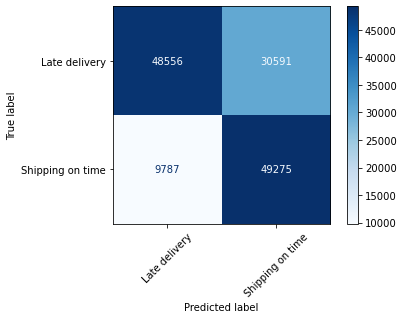

In [20]:
plot_confusion_matrix(logistic_regression, scaler_x_train, y_train,
                      cmap=plt.cm.Blues)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, rotation=45)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [21]:
print(classification_report(y_train, lr_pred_train, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.83      0.61      0.71     79147
Shipping on time       0.62      0.83      0.71     59062

        accuracy                           0.71    138209
       macro avg       0.72      0.72      0.71    138209
    weighted avg       0.74      0.71      0.71    138209



In [22]:
lr_pred_test = logistic_regression.predict(scaler_x_test)

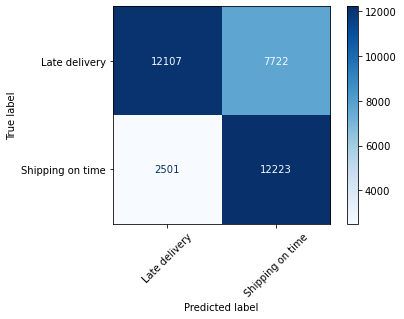

In [23]:
plot_confusion_matrix(logistic_regression, scaler_x_test, y_test,
                      cmap=plt.cm.Blues)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, rotation=45)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [24]:
print(classification_report(y_test, lr_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.83      0.61      0.70     19829
Shipping on time       0.61      0.83      0.71     14724

        accuracy                           0.70     34553
       macro avg       0.72      0.72      0.70     34553
    weighted avg       0.74      0.70      0.70     34553



In [25]:
#.60 before dropped high correlation columns
#results the same with correlation change

In [26]:
#.60 before delivery status change
#.71 after delivery status change